In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
tf.set_random_seed(777)

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [19]:
tf.reset_default_graph()

In [20]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [21]:
# input placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [22]:
# dropout (keep_prob) rate 0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

In [23]:
# weights & bias for nn layers
W1 = tf.get_variable("W1", shape = [784, 512], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

W2 = tf.get_variable("W2", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

W3 = tf.get_variable("W3", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob = keep_prob)

W4 = tf.get_variable("W4", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

W5 = tf.get_variable("W5", shape = [512, 10], initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [24]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [25]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [27]:
# train my model
for epoch in range(training_epochs) :
    avg_cost = 0
    
    for i in range(total_batch) :
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X : batch_xs, Y : batch_ys, keep_prob : 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

Epoch: 0001 cost = 0.443951454
Epoch: 0002 cost = 0.169258116
Epoch: 0003 cost = 0.129807208
Epoch: 0004 cost = 0.106768743
Epoch: 0005 cost = 0.091313070
Epoch: 0006 cost = 0.082627359
Epoch: 0007 cost = 0.073550031
Epoch: 0008 cost = 0.067345955
Epoch: 0009 cost = 0.064628741
Epoch: 0010 cost = 0.061160232
Epoch: 0011 cost = 0.058648273
Epoch: 0012 cost = 0.052000058
Epoch: 0013 cost = 0.050092157
Epoch: 0014 cost = 0.046069521
Epoch: 0015 cost = 0.043502596
Learning Finished!


In [29]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy : ', sess.run(accuracy, feed_dict = {X : mnist.test.images, Y : mnist.test.labels, keep_prob : 1}))

Accuracy :  0.9815


Label :  [4]
Prediction :  [4]


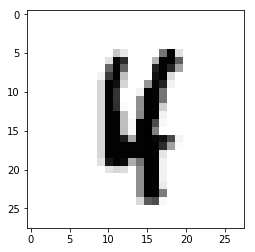

In [30]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples-1)
print('Label : ', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print('Prediction : ', sess.run(tf.argmax(hypothesis, 1), feed_dict = {X : mnist.test.images[r:r+1], keep_prob : 1}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()